# CUNY 620 Week 4 Assignment 2

# High Frequency Words

Team 2: Pavan Akula, Nathan(Seoungyoon) Lim, Christophe Hunt, Joel Park, Ilya Kats

Please answer the following questions in an IPython Notebook, posted to GitHub.

1. Choose a corpus of interest.
2. How many total unique words are in the corpus? (Please feel free to define unique words in any interesting, defensible way).
3. Taking the most common words, how many unique words represent half of the total words in the corpus?
4. Identify the 200 highest frequency words in this corpus.
5. Create a graph that shows the relative frequency of these 200 words.
6. Does the observed relative frequency of these words follow Zipf’s law? Explain.
7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

1. Choose a corpus of interest.

The corpus of interest that we will tackle is the candidate speeches between Donald Trump and Hillary Clinton in 2016.

Let's load the corpus. Let's start with Hillary Clinton and then load Donald Trump's speeches.

In [2]:
# Citing a webpage that I referenced:
# Resource: https://technaverbascripta.wordpress.com/2012/
# 09/25/loading-a-corpus-into-the-natural-language-toolkit/

# Load libraries
import nltk
import re # Will need regular expressions to clean up the texts
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [58]:
# Will download from github repository: 
# https://github.com/ilyakats/CUNY-DATA620/blob/master/data/Clinton-Trump%20Corpus.zip?raw=true
# and unzip the file.

import urllib, os, zipfile, glob
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [59]:
open('Clinton-Trump Corpus.zip', 'wb').write(urllib.urlopen('https://github.com/ilyakats/CUNY-DATA620/blob/master/data/Clinton-Trump%20Corpus.zip?raw=true').read())

In [60]:
zip_ref = zipfile.ZipFile(os.path.realpath('Clinton-Trump Corpus.zip'), 'r')
zip_ref.extractall(os.path.realpath(''))
zip_ref.close()

In [61]:
base_directory = os.getcwd()
os.chdir(base_directory + '/Clinton-Trump Corpus/Clinton')

In [62]:
# Looking at the first document
f = open('Clinton_2016-07-28.txt', 'rU')
text = f.read()
text1 = text.split()
abstracts = nltk.Text(text1)

In [31]:
# By using the concordance function in nltk, we can take a look at all the words that surround
# and make the context for the thank you!
abstracts.concordance('thank')

Displaying 14 of 14 matches:
                                     Thank you. Thank you so much. <APPLAUSE> T
                                     Thank you so much. <APPLAUSE> Thank you. T
k you. Thank you so much. <APPLAUSE> Thank you. Thank you all so much. <APPLAUS
k you so much. <APPLAUSE> Thank you. Thank you all so much. <APPLAUSE> <CLINTON
u all so much. <APPLAUSE> <CLINTON:> Thank you! Thank you! <APPLAUSE> Thank you
ch. <APPLAUSE> <CLINTON:> Thank you! Thank you! <APPLAUSE> Thank you all very, 
N:> Thank you! Thank you! <APPLAUSE> Thank you all very, very much! Thank you f
AUSE> Thank you all very, very much! Thank you for that amazing welcome! Thank 
 Thank you for that amazing welcome! Thank you all for the great convention tha
t we've had. <APPLAUSE> And Chelsea, thank you. I am so proud to be your mother
so proud of the woman you've become. Thank you for bringing Mark into our famil
 who joined this campaign this week, thank you. What a remarkable week it's bee
 president.

In [39]:
# The beginning portions of the first speech...
abstracts

<Text: <title="Hillary Clinton delivers remarks at the 2016 Democratic...>

As you can see, there's a lot of 'fluff' i.e. tags APPLAUSE and CLINTON. that we do not want to take into consideration when we perform text analysis. We will get back to this at a later time. Let's take a look into the rest of the speeches.

In [40]:
# How many Clinton speeches are there?
print len([name for name in os.listdir('.') if os.path.isfile(name)])

36


As we mentioned above, when we inspect the all of the documents more closely, there's a lot of tags that should not be used for text analysis. For example, the  tags AUDIENCE, TITLE, or the moderators. After looking at a series of documents, it appears that Clinton and Trump's statements do not have tags around their bodies of statements. Therefore, we'll use regular expressions to take the excess, and unnecessary texts. And then once we have cleaned up the text, we will load them into one list called 'clinton_list'.

In [63]:
# Create a list of Clinton speeches
clinton_list = []

for name in os.listdir('.'):
    f = open(name, 'rU')
    text = f.read()
    mod_text = re.sub('<.*?>', '', text) #Remove all of the unnecessary <> tags
    text1 = mod_text.split()
    abstracts = nltk.Text(text1)
    clinton_list.append(abstracts)

In [36]:
# List the first 10 speeches for Clinton
clinton_list[:10]

[<Text: Thank you very much. We had an amazing...>,
 <Text: Thank you, Mike. Thank you, everybody. Who ?...>,
 <Text: Thank you very much, everybody. Wow. Thank you....>,
 <Text: So, it's been 235 days since crooked Hillary...>,
 <Text: Thank you. Whoa. Whoa. This is amazing. This...>,
 <Text: Thank you. Thank you. Thank you very much....>,
 <Text: Thank you. So we have tremendous crowds of...>,
 <Text: I want to tell you, you happen to...>,
 <Text: So how good is he? How good is...>,
 <Text: Thank you,everybody. Thank you very much. Thank you....>]

In [33]:
# Again, let's take a look at the cleaner version of the first speech
clinton_list[0]

# As you can see, the text is cleaned up quite significantly.

<Text: Thank you. Thank you so much. Thank you....>

2. How many total unique words are in the corpus? (Please feel free to define unique words in any interesting, defensible way).

In [43]:
# Let's take the first speech and count how many words there are?
len(clinton_list[0])

5410

As you can see, there are a total of 5410 words. However, we need to find the total amount of unique words that are in the corpus (at least for this first speech). Let's use the function set(). 

In [44]:
len(set(clinton_list[0]))

1776

There are 1776 (like the birth year of America) unique words in the first speech alone. Now let's perform the same function, but over the entire list for clinton_list.

There are many different variations of the same word in this corpus. For example, 'bringing' and 'bring' will be considered one unique word, and not two separate words. To do this, we will be 'stemming' the words so that way we can try to standardize the words in a way that won't create accidental duplicates of the words (and get counted twice.)

From the website noted below, the defintion of stemming is: "Interfaces used to remove morphological affixes from words, leavingonly the word stem. Stemming algorithms aim to remove those affixes required for eg. grammatical role, tense, derivational morphology leaving only the stem of the word.  This is a difficult problem due to irregular words (eg. common verbs in English), complicated morphological rules, and part-of-speech and sense ambiguities (eg. ``ceil-`` is not the stem of ``ceiling``)."

In [64]:
# https://stackoverflow.com/questions/771918/how-do-i-do-word-stemming-or-lemmatization
from nltk.stem.porter import PorterStemmer

# There are three main stemmer algorithms: Lancaster, Porter, and Snowball
# In this particular example, we will use the PorterStemmer by random selection

porter_stemmer = PorterStemmer()

word_list_clinton = []
for speech in (clinton_list):
    for word in speech:
        # https://stackoverflow.com/questions/265960/best-way-to-strip-punctuation-from-a-string-in-python
        word2 = re.sub(r'[^\w\s]','',word)
        temp = porter_stemmer.stem(word2)
        if temp not in word_list_clinton:
            word_list_clinton.append(temp)

# Will list the first 15 words. This will demonstrate how the words are standarized and stemmed.
word_list_clinton[:15]

['thank',
 'you',
 'so',
 'much',
 'all',
 u'veri',
 'for',
 'that',
 u'amaz',
 u'welcom',
 'the',
 'great',
 u'convent',
 'weve',
 'had']

In [56]:
# Given that the word_list is already unique, we can simply count the amount of words in the
# list to give us number of unique words in the Clinton Speech Corpus.
len(word_list_clinton)

4431

Now let us perform the same workup but for Donald Trump's speeches

In [65]:
# Again, we will perform the same for Trump's speeches
os.chdir(base_directory + '/Clinton-Trump Corpus/Trump')

trump_list = []

for name in os.listdir('.'):
    f = open(name, 'rU')
    text = f.read()
    mod_text = re.sub('<.*?>', '', text) #Remove all of the unnecessary <> tags
    text1 = mod_text.split()
    abstracts = nltk.Text(text1)
    trump_list.append(abstracts)

# List the first 10 speeches from Trump
trump_list[:10]

[<Text: Thank you very much. We had an amazing...>,
 <Text: Thank you, Mike. Thank you, everybody. Who ?...>,
 <Text: Thank you very much, everybody. Wow. Thank you....>,
 <Text: So, it's been 235 days since crooked Hillary...>,
 <Text: Thank you. Whoa. Whoa. This is amazing. This...>,
 <Text: Thank you. Thank you. Thank you very much....>,
 <Text: Thank you. So we have tremendous crowds of...>,
 <Text: I want to tell you, you happen to...>,
 <Text: So how good is he? How good is...>,
 <Text: Thank you,everybody. Thank you very much. Thank you....>]

In [66]:
word_list_trump = []
for speech in (trump_list):
    for word in speech:
        # https://stackoverflow.com/questions/265960/best-way-to-strip-punctuation-from-a-string-in-python
        word2 = re.sub(r'[^\w\s]','',word)
        temp = porter_stemmer.stem(word2)
        if temp not in word_list_trump:
            word_list_trump.append(temp)

# Example with 15 words from Trump that are now standardized and stemmed.
word_list_trump[:15]

['thank',
 'you',
 u'veri',
 'much',
 'We',
 'had',
 'an',
 u'amaz',
 u'convent',
 'that',
 u'wa',
 'one',
 'of',
 'the',
 'best']

Above, is the list of unique word list for Donald Trump's speeches.

In [67]:
# Total unique word count for Donald Trump's speeches
len(word_list_trump)

6167

Believe it or not, it appears that Donald Trump has used more unique words than Hillary Clinton. (However, the quality of the words could be up for debate!)

#3. Taking the most common words, how many unique words represent half of the total words in the corpus?

#4. Identify the 200 highest frequency words in this corpus.

#5. Create a graph that shows the relative frequency of these 200 words.

These 3 questions will be addressed simultaneously as by addressing one of these questions, we can certainly address the other two questions. (The questions will be answered slightly out of order.) 

In order to calculate how many unique words repreent half of the total words in the corpus, we need to calculate the total number of words for all of the speech corpus for each candidate (Donald Trump and Hillary Clinton). 

In [67]:
# Hillary Clinton
# Again, quite similarly, will create an entire list of all of the speeches.
# The code will look quite similar as above, but with some slight differences
hillary_speech = []

for speech in clinton_list:
    for word in speech:
        word2 = re.sub(r'[^\w\s]','',word)
        temp = porter_stemmer.stem(word2)
        hillary_speech.append(temp)
        
# Calculate the total amount of words in the Hillary's speech corpus
total_words_clinton = len(hillary_speech)
total_words_clinton

114305

In [49]:
# Therefore half of the total amount of words would be:
from __future__ import division # Given python 2, will give floating numbers, instead of ints
half_words_clinton = int(total_words_clinton/2) # need to round to a whole number, since
                                                # we can't have a fraction of a word
half_words_clinton

57152

In [23]:
# Convert list into string
# https://stackoverflow.com/questions/5618878/how-to-convert-list-to-string

hillary_str = ' '.join(hillary_speech)

In [33]:
# Using Conditional Frequency Distribution
# https://stackoverflow.com/questions/4634787/freqdist-with-nltk

words = nltk.tokenize.word_tokenize(hillary_str)
fdist_clinton = FreqDist(words)
list(fdist_clinton)[:10]

[u'temperament',
 u'SO',
 u'four',
 u'catch',
 u'protest',
 u'halloween',
 u'sleep',
 u'asian',
 u'eskelsen',
 u'oper']

In [111]:
# Answering question 4 for the 200 most commonly (unique) used words in the Clinton Corpus
# https://stackoverflow.com/questions/23042699/freqdist-in-nltk-not-sorting-output
fdist_clinton.most_common(200)

[(u'to', 4418),
 (u'and', 4390),
 (u'the', 3956),
 (u'I', 2581),
 (u'of', 2261),
 (u'that', 2183),
 (u'a', 1994),
 (u'you', 1948),
 (u'in', 1716),
 (u'we', 1400),
 (u'for', 1308),
 (u'it', 1205),
 (u'is', 1120),
 (u'our', 1077),
 (u'have', 1022),
 (u'he', 852),
 (u'be', 831),
 (u'what', 822),
 (u'go', 764),
 (u'thi', 756),
 (u'are', 740),
 (u'peopl', 677),
 (u'do', 674),
 (u'not', 658),
 (u'know', 655),
 (u'on', 652),
 (u'who', 627),
 (u'with', 601),
 (u'work', 581),
 (u'all', 581),
 (u'about', 579),
 (u'want', 566),
 (u'but', 555),
 (u'were', 552),
 (u'will', 550),
 (u'can', 532),
 (u'make', 507),
 (u'as', 502),
 (u'wa', 498),
 (u'becaus', 496),
 (u'get', 486),
 (u'they', 483),
 (u'your', 469),
 (u'so', 466),
 (u'my', 455),
 (u'america', 425),
 (u'just', 408),
 (u'trump', 393),
 (u'out', 381),
 (u'countri', 377),
 (u'when', 374),
 (u'here', 372),
 (u'at', 371),
 (u'We', 368),
 (u'presid', 359),
 (u'more', 358),
 (u'from', 355),
 (u'hi', 353),
 (u'now', 352),
 (u'up', 352),
 (u'america

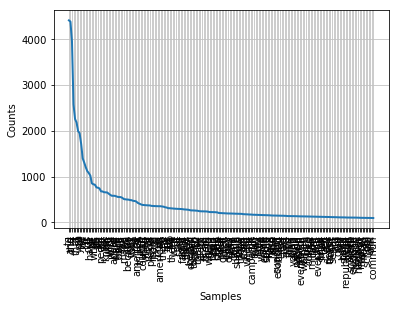

In [112]:
# To answer question 5, create a graph that shows the relative frequency of these 200 words.
fdist_clinton.plot(200, cumulative = False)

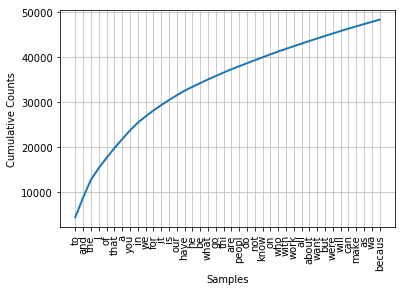

In [110]:
# To make visualization easier on the eyes, will only do the first 40 highest frequency words
fdist_clinton.plot(40, cumulative = True)

As you can see from the above graph that we are at 40 words and have not yet hit 50k words to make the halfway mark. (The number to reach for halfway mark is: 57152). Let's find out how many unique words does it take to make it to 57152! (This will answer question 3). 

In [125]:
total_word_count = 0
unique_count = 0

for word, count in fdist_clinton.most_common(200):
    if total_word_count < 57152:
        unique_count = unique_count + 1
        total_word_count = total_word_count + count
    else:
        print("Total number of unique words to make half of the words is:", unique_count)
        break

('Total number of unique words to make half of the words is:', 63)


We can perform a similar feat again for Donald Trump's speeches and answer these following questions.

In [51]:
donald_speech = []

for speech in trump_list:
    for word in speech:
        word2 = re.sub(r'[^\w\s]','',word)
        temp = porter_stemmer.stem(word2)
        donald_speech.append(temp)
        
# Calculate the total amount of words in the Donald's speech corpus
total_words_trump = len(donald_speech)
total_words_trump

430570

In [52]:
half_words_trump = int(total_words_trump/2) # need to round to a whole number, since
                                                # we can't have a fraction of a word
half_words_trump 

215285

In [53]:
# Stringing all of Trump's speech into one long raw string.
donald_str = ' '.join(donald_speech)

In [54]:
words_d = nltk.tokenize.word_tokenize(donald_str)
fdist_trump = FreqDist(words_d)
list(fdist_trump)[:10]

[u'yellow',
 u'four',
 u'jihad',
 u'fouryear',
 u'scold',
 u'lord',
 u'digit',
 u'780000',
 u'publicpriv',
 u'honeywel']

In [55]:
# Answering question 4 for the 200 most commonly (unique) used words in the Trump Corpus
fdist_trump.most_common(200)

[(u'the', 15826),
 (u'and', 14376),
 (u'to', 13644),
 (u'of', 8364),
 (u'a', 8060),
 (u'it', 7572),
 (u'you', 7549),
 (u'I', 7480),
 (u'that', 6649),
 (u'go', 5880),
 (u'in', 5650),
 (u'have', 4965),
 (u'we', 4325),
 (u'they', 4146),
 (u'our', 3970),
 (u'is', 3894),
 (u'were', 3730),
 (u'for', 3449),
 (u'are', 3288),
 (u'thi', 3272),
 (u'be', 3185),
 (u'peopl', 3167),
 (u'will', 3041),
 (u'she', 2747),
 (u'but', 2679),
 (u'We', 2573),
 (u'what', 2476),
 (u'know', 2443),
 (u'do', 2406),
 (u'countri', 2217),
 (u'wa', 2103),
 (u'not', 2080),
 (u'all', 2048),
 (u'with', 1963),
 (u'on', 1923),
 (u'your', 1890),
 (u'so', 1878),
 (u'want', 1865),
 (u'dont', 1772),
 (u'great', 1735),
 (u'get', 1732),
 (u'veri', 1696),
 (u'job', 1629),
 (u'said', 1586),
 (u'one', 1571),
 (u'right', 1538),
 (u'hillari', 1522),
 (u'say', 1463),
 (u'theyr', 1462),
 (u'like', 1427),
 (u'about', 1386),
 (u'he', 1373),
 (u'out', 1365),
 (u'just', 1358),
 (u'them', 1350),
 (u'clinton', 1346),
 (u'becaus', 1328),
 (u'm

As you can see, many of both Trump's and Clinton's most common words are stop words. To interpret the significance of each speeches can be particularly difficult if most of the words are the most commonly used word. What we'll do next is remove the stop words and take another look at the speeches. 

In [56]:
from nltk.corpus import stopwords

In [63]:
hillary_speech_mod = []

for speech in clinton_list:
    for word in speech:
        word2 = re.sub(r'[^\w\s]','',word)
        temp = porter_stemmer.stem(word2)
        if temp not in stopwords.words('english'):
            hillary_speech_mod.append(temp)
            
hillary_str_mod = ' '.join(hillary_speech_mod)
words_c_mod = nltk.tokenize.word_tokenize(hillary_str_mod)
fdist_clinton = FreqDist(words_c_mod)
            
donald_speech_mod = []

for speech in trump_list:
    for word in speech:
        word2 = re.sub(r'[^\w\s]','',word)
        temp = porter_stemmer.stem(word2)
        if temp not in stopwords.words('english'):
            donald_speech_mod.append(temp)
            
donald_str_mod = ' '.join(donald_speech_mod)
words_d_mod = nltk.tokenize.word_tokenize(donald_str_mod)
fdist_trump = FreqDist(words_d_mod)

In [64]:
fdist_clinton.most_common(50)

[(u'I', 2581),
 (u'go', 764),
 (u'thi', 756),
 (u'peopl', 677),
 (u'know', 655),
 (u'work', 581),
 (u'want', 566),
 (u'make', 507),
 (u'wa', 498),
 (u'becaus', 496),
 (u'get', 486),
 (u'america', 425),
 (u'trump', 393),
 (u'countri', 377),
 (u'We', 368),
 (u'presid', 359),
 (u'hi', 353),
 (u'american', 351),
 (u'So', 346),
 (u'think', 340),
 (u'say', 328),
 (u'us', 308),
 (u'ha', 308),
 (u'job', 304),
 (u'vote', 298),
 (u'got', 294),
 (u'said', 293),
 (u'right', 289),
 (u'famili', 283),
 (u'one', 278),
 (u'believ', 266),
 (u'donald', 260),
 (u'well', 260),
 (u'togeth', 257),
 (u'everi', 254),
 (u'thank', 245),
 (u'Im', 241),
 (u'elect', 240),
 (u'realli', 240),
 (u'help', 232),
 (u'would', 224),
 (u'dont', 224),
 (u'need', 224),
 (u'He', 219),
 (u'state', 204),
 (u'like', 202),
 (u'year', 201),
 (u'great', 197),
 (u'tell', 195),
 (u'back', 195)]

In [65]:
fdist_trump.most_common(50)

[(u'I', 7480),
 (u'go', 5880),
 (u'thi', 3272),
 (u'peopl', 3167),
 (u'We', 2573),
 (u'know', 2443),
 (u'countri', 2217),
 (u'wa', 2103),
 (u'want', 1865),
 (u'dont', 1772),
 (u'great', 1735),
 (u'get', 1732),
 (u'veri', 1696),
 (u'job', 1629),
 (u'said', 1586),
 (u'one', 1571),
 (u'right', 1538),
 (u'hillari', 1522),
 (u'say', 1463),
 (u'theyr', 1462),
 (u'like', 1427),
 (u'clinton', 1346),
 (u'becaus', 1328),
 (u'Im', 1160),
 (u'So', 1156),
 (u'make', 1147),
 (u'think', 1122),
 (u'happen', 1105),
 (u'look', 1089),
 (u'thank', 1084),
 (u'state', 1065),
 (u'time', 1062),
 (u'american', 1044),
 (u'back', 1033),
 (u'ha', 994),
 (u'year', 978),
 (u'take', 946),
 (u'never', 924),
 (u'thing', 919),
 (u'well', 917),
 (u'way', 865),
 (u'come', 857),
 (u'mani', 831),
 (u'lot', 811),
 (u'win', 801),
 (u'got', 796),
 (u'new', 793),
 (u'see', 787),
 (u'much', 778),
 (u'good', 742)]

#6. Does the observed relative frequency of these words follow Zipf’s law? Explain.

According to Wikipedia (https://en.wikipedia.org/wiki/Zipf%27s_law), "Zipf's law is an empirical law formulated using mathematical statistics that refers to the fact that many types of data studied in the physical and social sciences can be approximated with a Zipfian distribution, one of a family of related discrete power law probability distributions. Zipf's law states that given some corpus of natural language utterances, the frequency of any word is inversely proportional to its rank in the frequency table. Thus the most frequent word will occur approximately twice as often as the second most frequent word, three times as often as the third most frequent word, etc.: the rank-frequency distribution is an inverse relation."

As we look at the frequency distribution in the above graph, we do notice that there is a power distribution, so yes, this distribution does follow Zipf's law. 

#7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

I suspect that most of the word choices here in this corpus are more related to politics and patriotism. Therefore, some words, such as "America" and "democracy" will most likely show up more frequently than usual. As demonstrated as below: 

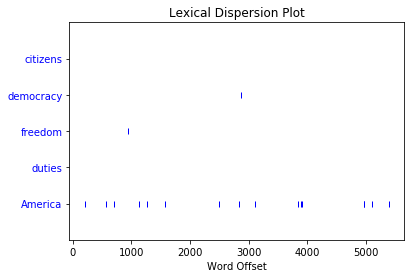

In [34]:
# http://www.nltk.org/book/ch01.html
clinton_list[0].dispersion_plot(["citizens", "democracy", "freedom", "duties", "America"])

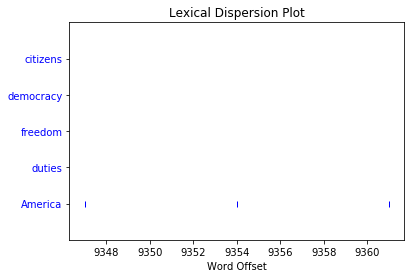

In [68]:
trump_list[10].dispersion_plot(["citizens", "democracy", "freedom", "duties", "America"])

# Further look into a larger Trump and Clinton Database

The initial zip drive that was provided above was a smaller subset of Trump and Clinton speeches. Let's take a look at the complete set of speeches and analyze them.

In [68]:
os.chdir(base_directory)

open('HillaryClinton.zip', 'wb').write(urllib.urlopen('https://github.com/ilyakats/CUNY-DATA620/blob/master/data/HillaryClinton.zip?raw=true').read())
open('DonaldTrump.zip', 'wb').write(urllib.urlopen('https://github.com/ilyakats/CUNY-DATA620/blob/master/data/DonaldTrump.zip?raw=true').read())

In [69]:
zip_ref = zipfile.ZipFile(os.path.realpath('HillaryClinton.zip'), 'r')
zip_ref.extractall(os.path.realpath(''))
zip_ref = zipfile.ZipFile(os.path.realpath('DonaldTrump.zip'), 'r')
zip_ref.extractall(os.path.realpath(''))
zip_ref.close()

In [70]:
os.unlink('DonaldTrump.zip')
os.unlink('HillaryClinton.zip')

In [86]:
read_files = glob.glob(os.path.realpath('DonaldTrump') + "\\*.txt")

with open("DonaldTrump.txt", "wb") as DonaldTrump:
    for f in read_files:
        with open(f, "rb") as infile:
            DonaldTrump.write(infile.read())

read_files = glob.glob(os.path.realpath('HillaryClinton') + "\\*.txt")

with open("HillaryClinton.txt", "wb") as HillaryClinton:
    for f in read_files:
        with open(f, "rb") as infile:
            HillaryClinton.write(infile.read())

In [56]:
f = open('DonaldTrump.txt', 'rU')
DT_text = f.read()

f = open('HillaryClinton.txt', 'rU')
HC_text = f.read()

In [57]:
#How many total unique words are in the corpus? (Please feel free to define unique words in any interesting, defensible way).
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import pandas as pd
from collections import Counter

tokens = RegexpTokenizer(r'\w+').tokenize(HC_text)
lower_words = [w.lower() for w in tokens]
filtered_words = [word for word in lower_words if word not in stopwords.words('english')]
stemmed_words = [PorterStemmer().stem(word) for word in filtered_words]
HC_results = Counter(stemmed_words)    

In [50]:
print ('%d unique stemmed words' % len(HC_results))
pd.DataFrame(zip(HC_results.values(),HC_results.keys())).sort_values(by = [0], axis=0, ascending=False).head(10)

0 unique stemmed words


KeyError: 0

In [75]:
tokens = RegexpTokenizer(r'\w+').tokenize(DT_text)
lower_words = [w.lower() for w in tokens]
filtered_words = [word for word in lower_words if word not in stopwords.words('english')]
stemmed_words = [PorterStemmer().stem(word) for word in filtered_words]
DT_results = Counter(stemmed_words) 

In [76]:
print ('%d unique stemmed words' % len(DT_results))
pd.DataFrame(zip(DT_results.values(),DT_results.keys())).sort_values(by = [0], axis=0, ascending=False).head(10)

0 unique stemmed words


KeyError: 0

In [77]:
# 3. Taking the most common words, how many unique words represent half of the total words in the corpus?
x = pd.DataFrame(zip(HC_results.keys(), HC_results.values()))
x.columns = ['word', 'counts']
x = x.sort_values(['counts'], ascending=[0])
x['cum_sum'] = x.counts.cumsum()
x['cum_perc'] = x.cum_sum/x.counts.sum()
HC_word_results = x
HC_word_results_top50 = HC_word_results[HC_word_results['cum_perc'] <= .50]

print ('%d unique stemmed words represent the top half of words in the corpus' % len(HC_word_results_top50))

ValueError: Length mismatch: Expected axis has 0 elements, new values have 2 elements

In [78]:
x = pd.DataFrame(zip(DT_results.keys(), DT_results.values()))
x.columns = ['word', 'counts']
x = x.sort_values(['counts'], ascending=[0])
x['cum_sum'] = x.counts.cumsum()
x['cum_perc'] = x.cum_sum/x.counts.sum()
DT_word_results = x
DT_word_results_top50 = DT_word_results[DT_word_results['cum_perc'] <= .50]

print ('%d unique stemmed words represent the top half of words in the corpus' % len(DT_word_results_top50))

ValueError: Length mismatch: Expected axis has 0 elements, new values have 2 elements

In [79]:
# 4. Identify the 200 highest frequency words in this corpus.
HC_word_results_top200 = HC_word_results.head(200)
DT_word_results_top200 = DT_word_results.head(200)

NameError: name 'HC_word_results' is not defined

In [80]:
import matplotlib.pyplot as plt
HC_word_results_top200.plot( x = 'word', y = 'cum_sum')
plt.show()

NameError: name 'HC_word_results_top200' is not defined

In [81]:
DT_word_results_top200.plot( x = 'word', y = 'cum_sum')
plt.show()

NameError: name 'DT_word_results_top200' is not defined

In [82]:
tokens = RegexpTokenizer(r'\w+').tokenize(HC_text)
text = nltk.Text(tokens)
text.concordance("Trump")

No matches


In [83]:
tokens = RegexpTokenizer(r'\w+').tokenize(DT_text)
text = nltk.Text(tokens)
text.concordance("Clinton")

No matches
